# Part 3: FULL BAYESIAN + PREDICTIVE DISTRIBUTION

## 1.Generate 50 2D-data points using the following function:$y=sin(x^2+1)$. Add Gaussian random noise to the data. Show the original curve line and the noisy data.

start...
f:          3         2
-0.9384 x + 1.133 x - 0.1204 x + 0.8459


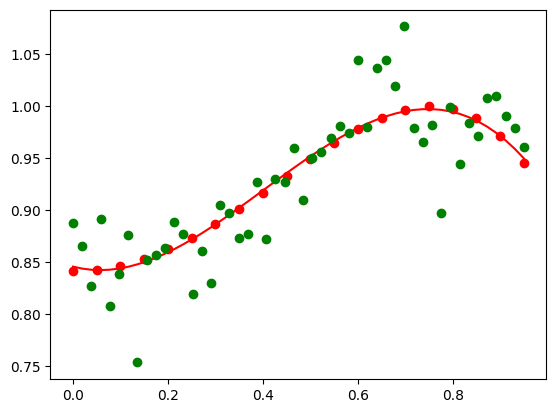

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

def actual_distribution():
    x=np.arange(0,1,0.05);
    y=np.sin(np.power(x,2)+1)
    return x,y

def add_noise(y_curve):
    mu=0
    sigma=0.03
    noise=np.random.normal(mu,sigma,len(y_curve))
    y_noise=y_curve+noise
    return y_noise

def numpy_poly_fitting(x,y,M):
    z=np.polyfit(x,y,M)
    f=np.poly1d(z)
    return f

#===============================================

print('start...')
#generate true data
x_true,y_true = actual_distribution()

#fit on the actual data
f=numpy_poly_fitting(x_true,y_true,M=3)
print('f:',f)
x_curve=np.linspace(x_true[0],x_true[-1],50)
y_curve=f(x_curve)

#add noise on the true data
y_noise=add_noise(y_curve)
x_noise=x_curve

#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.show()
    

## 2.Compute w based on the full Bayesian inference (by using basis functions like discussed in class). Display the estimated values of w.

w is [[ 0.90629651]
 [-0.08642835]
 [ 0.05866606]
 [ 0.07190123]]
M = 3 ,alpha = 0.1 ,beta =  10 ,s = 0.2


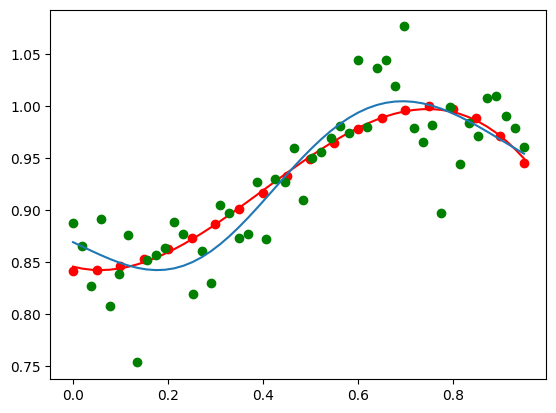

In [2]:
def Gaussian_basis_Func(x,mu,s):
    G = np.exp(-np.power((x-mu),2)/(2*s*s))
    return G

def full_Bayesian_inference(x,y,M,alpha,beta,s):
    N=len(x)
    mx=np.zeros([N,M+1])
    vy=np.zeros([N,1])
    fai=np.zeros([M+1,1])
    I=np.identity(M+1)
    Ialpha=alpha*I
    
    for n in range(0,N):
        for m in range(0,M+1):
            if m == 0:
                fai[0]=1
            else:
                mu = m/(M+1)
                fai[m]=Gaussian_basis_Func(x[n],mu,s)
            mx[n][m]=np.power(fai[m],1)
        vy[n][0]=y[n]
    
    mxx=np.dot(mx.T,mx)
    imxx=linalg.inv(beta*mxx+Ialpha)# covariance matrix 
    tmp=np.dot(imxx,mx.T)
    w=np.dot(beta*tmp,vy)
    y=np.dot(mx,w)    
    print('w is',w)
    print('M =',M,',alpha =',alpha,',beta = ',beta,',s =',s)
    return x,y

#===============================================

#estimate the curve from the noisy data
[x_est,y_est]=full_Bayesian_inference(x_noise,y_noise,M=3,alpha=0.1,beta=10,s=0.2)

#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.plot(x_est,y_est)
plt.show()

## 3.Experiment with your code by changing alpha and beta. Discuss the meaning of them with respect to the curve fitting results.

w is [[ 0.90629651]
 [-0.08642835]
 [ 0.05866606]
 [ 0.07190123]]
M = 3 ,alpha = 0.1 ,beta =  10 ,s = 0.2


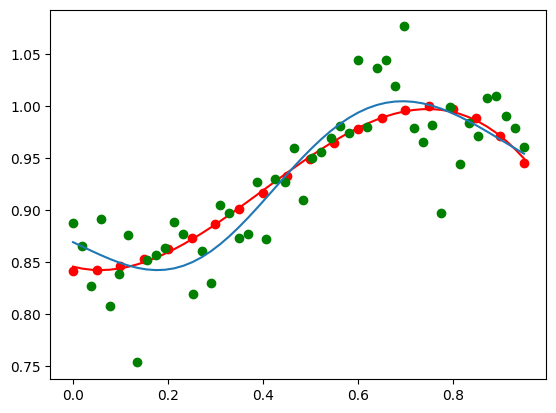

w is [[ 0.85081235]
 [-0.0187984 ]
 [ 0.04681392]
 [ 0.13633457]]
M = 3 ,alpha = 1 ,beta =  10 ,s = 0.2


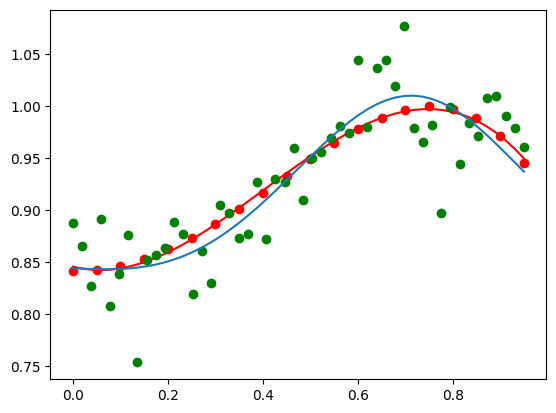

w is [[0.75160104]
 [0.09072777]
 [0.04245342]
 [0.23718142]]
M = 3 ,alpha = 5 ,beta =  10 ,s = 0.2


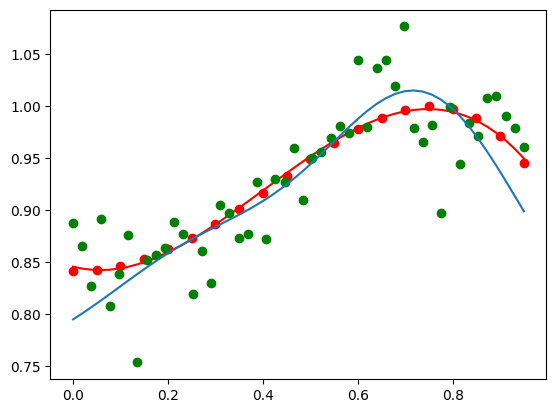

w is [[0.79828925]
 [0.04197232]
 [0.04043876]
 [0.19325233]]
M = 3 ,alpha = 5 ,beta =  20 ,s = 0.2


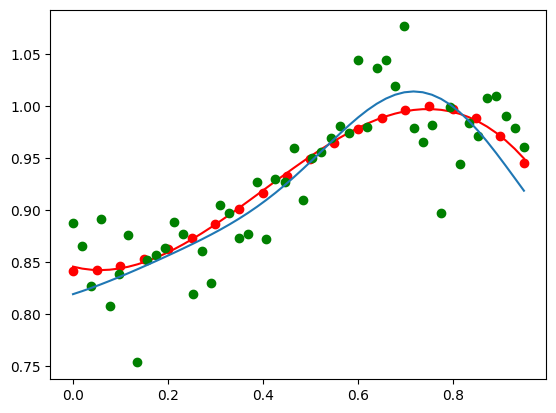

In [3]:
#Experiment by changing alpha and beta
[x_est,y_est]=full_Bayesian_inference(x_noise,y_noise,M=3,alpha=0.1,beta=10,s=0.2)

#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.plot(x_est,y_est)
plt.show()

#estimate the curve
[x_est1,y_est1]=full_Bayesian_inference(x_noise,y_noise,M=3,alpha=1,beta=10,s=0.2)
#show plot1
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.plot(x_est1,y_est1)
plt.show()

#estimate the curve
[x_est2,y_est2]=full_Bayesian_inference(x_noise,y_noise,M=3,alpha=5,beta=10,s=0.2)
#show plot2
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.plot(x_est2,y_est2)
plt.show()

#estimate the curve
[x_est3,y_est3]=full_Bayesian_inference(x_noise,y_noise,M=3,alpha=5,beta=20,s=0.2)
#show plot3
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.plot(x_est3,y_est3)
plt.show()

## 4.Show your best fitting

w is [[ 0.86977105]
 [-0.07309376]
 [ 0.1665141 ]]
M = 2 ,alpha = 0.1 ,beta =  100 ,s = 0.3


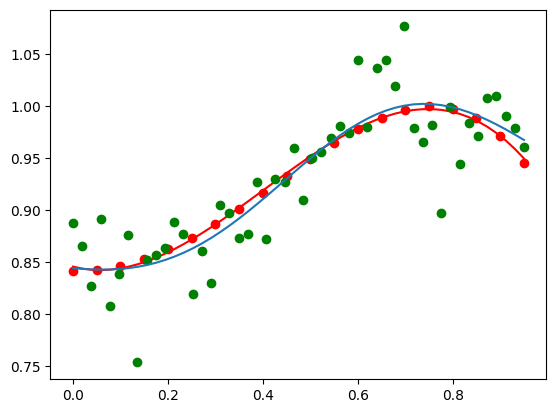

In [4]:
#best fitting
[x_est_best,y_est_best]=full_Bayesian_inference(x_noise,y_noise,M=2,alpha=0.1,beta=100,s=0.3)

#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.plot(x_est_best,y_est_best)
plt.show()

## 5.Explain how useful p(w|t) for the training and testing stages.

## 6.Generate 50 2D-data points using the following function:$y=sin(x^2+1)$. Add Gaussian random noise to the data. Show the original curve line and the noisy data.

f:          3         2
-0.9384 x + 1.133 x - 0.1204 x + 0.8459


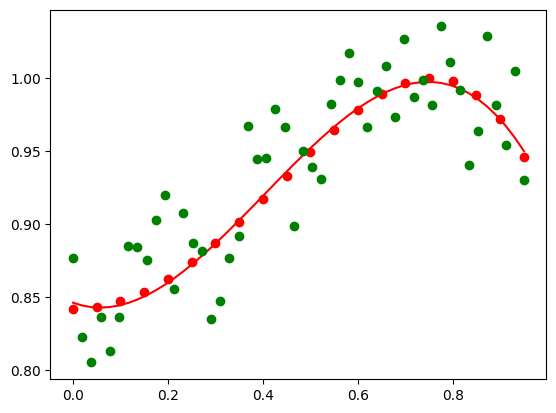

In [5]:
#generate true data
x_true,y_true = actual_distribution()

#fit on the actual data
f=numpy_poly_fitting(x_true,y_true,M=3)
print('f:',f)
x_curve=np.linspace(x_true[0],x_true[-1],50)
y_curve=f(x_curve)

#add noise on the true data
y_noise=add_noise(y_curve)
x_noise=x_curve

#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.show()

## 7.Compute the predictive distribution of every input data sequentially, where each input data is taken randomly from the noise data. Show your best prediction results for all 50 data one by one:

start...
N1 = 1
M = 14
N2 = 50
[5]
1


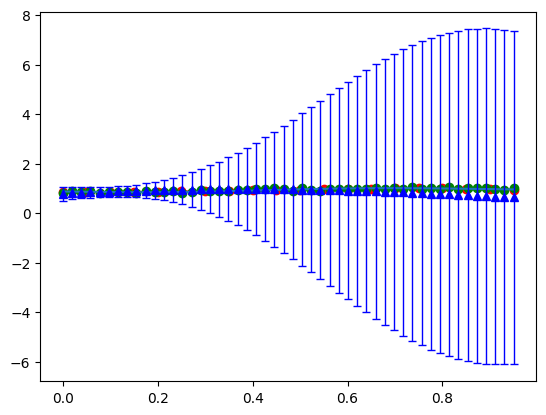

N1 = 2
M = 14
N2 = 50
[5, 4]
2


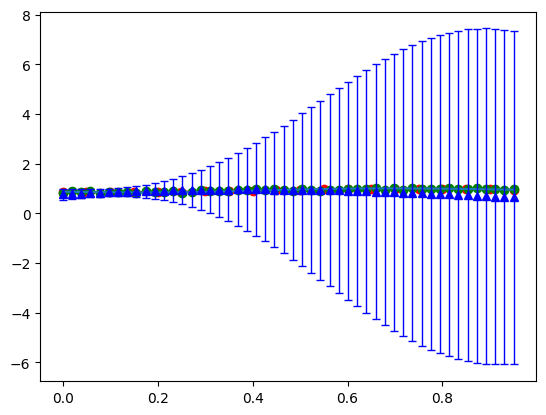

N1 = 3
M = 14
N2 = 50
[5, 4, 25]
3


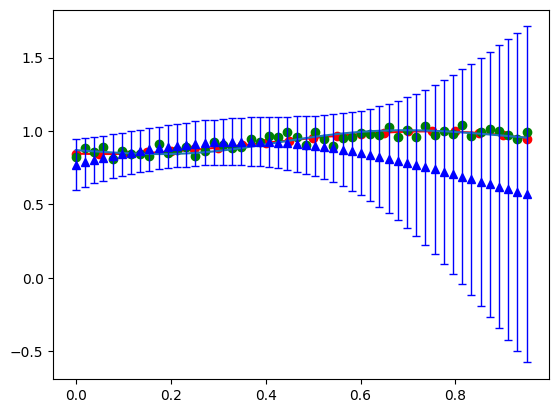

N1 = 4
M = 14
N2 = 50
[5, 4, 25, 9]
4


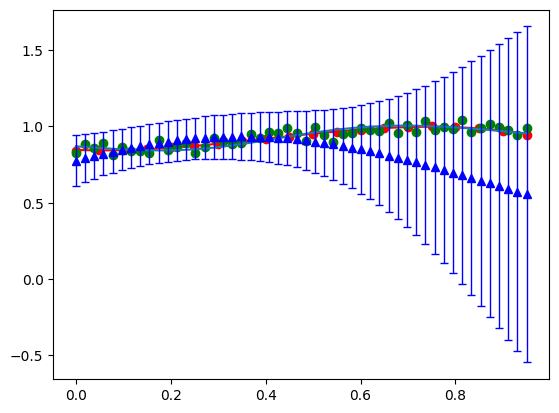

N1 = 5
M = 14
N2 = 50
[5, 4, 25, 9, 39]
5


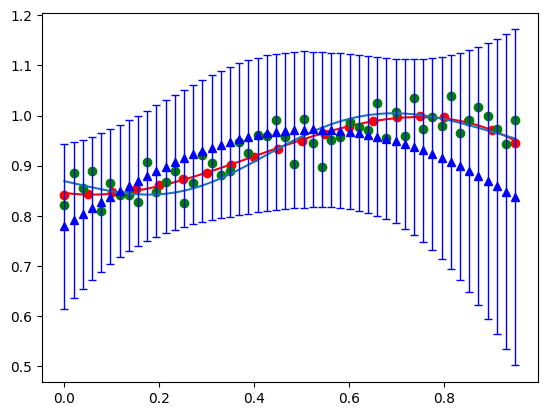

N1 = 6
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33]
6


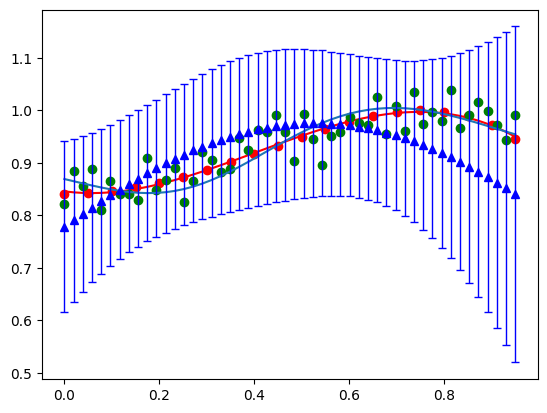

N1 = 7
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39]
7


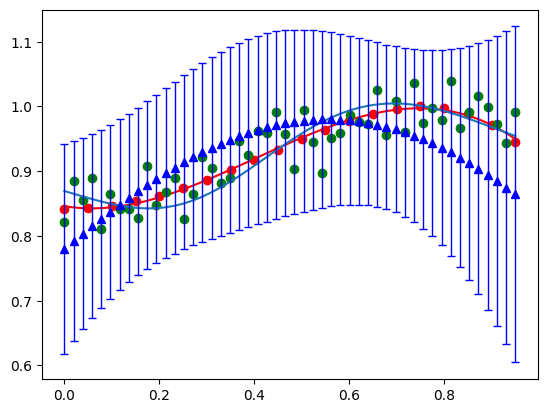

N1 = 8
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27]
8


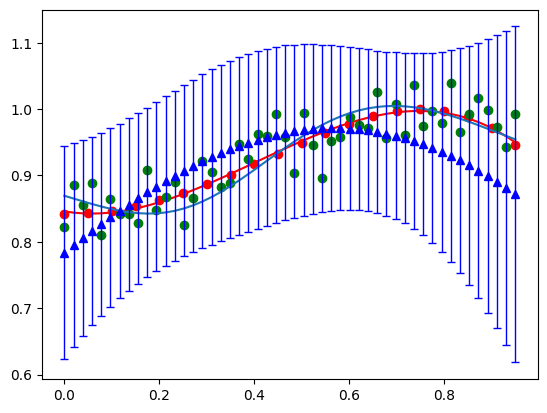

N1 = 9
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43]
9


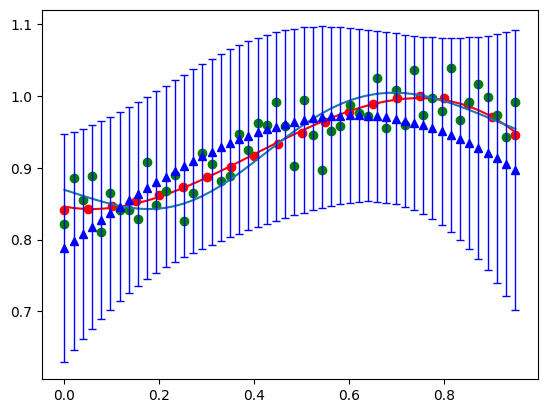

N1 = 10
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3]
10


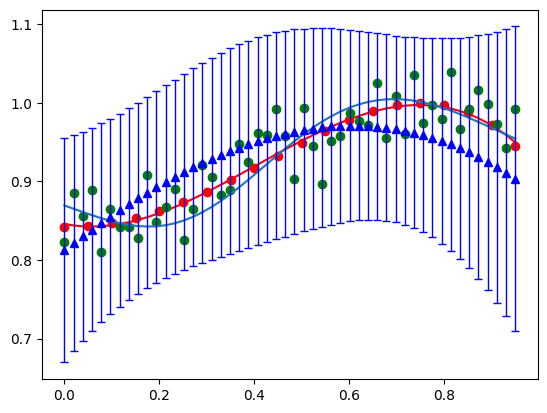

N1 = 11
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36]
11


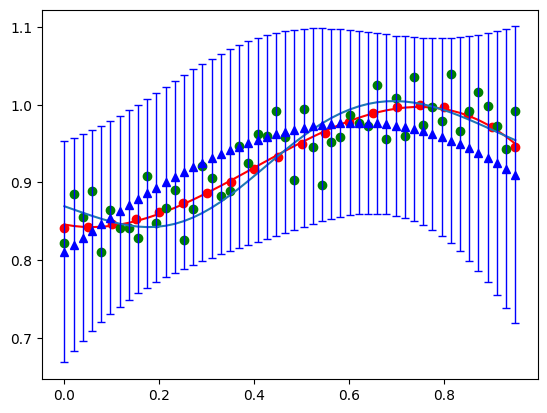

N1 = 12
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9]
12


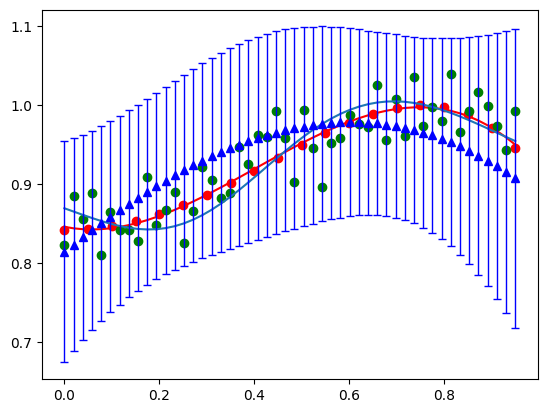

N1 = 13
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6]
13


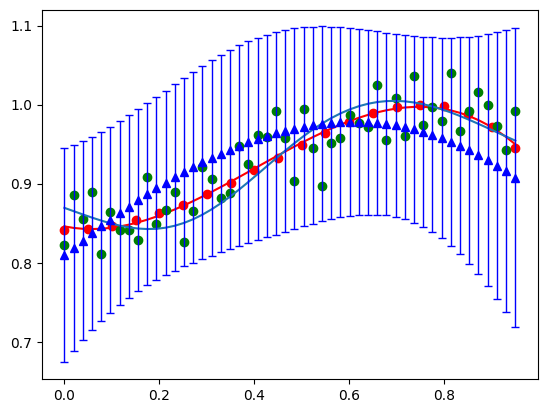

N1 = 14
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0]
14


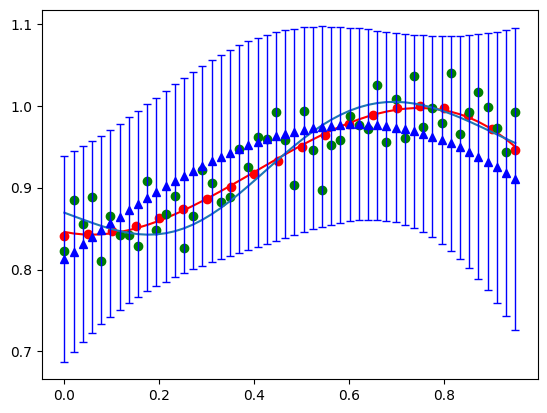

N1 = 15
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48]
15


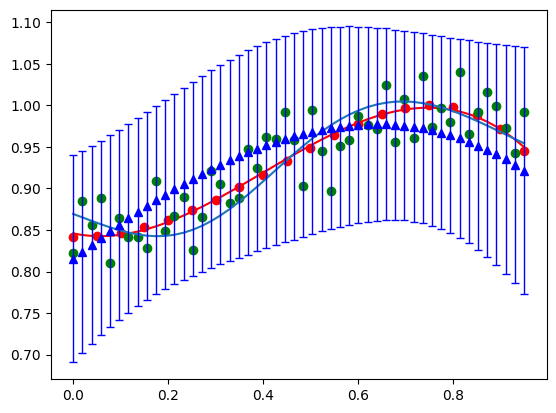

N1 = 16
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48, 18]
16


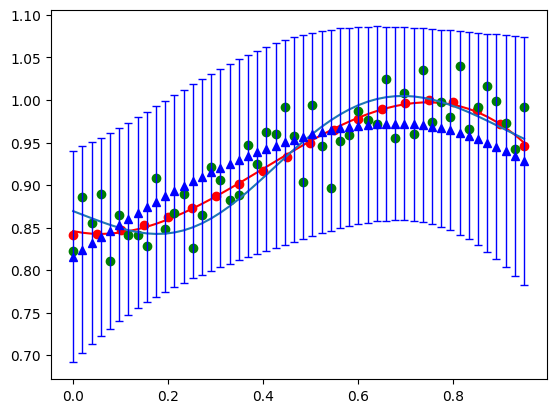

N1 = 17
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48, 18, 32]
17


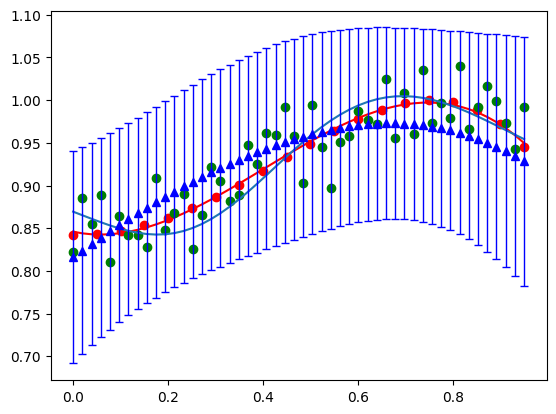

N1 = 18
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48, 18, 32, 29]
18


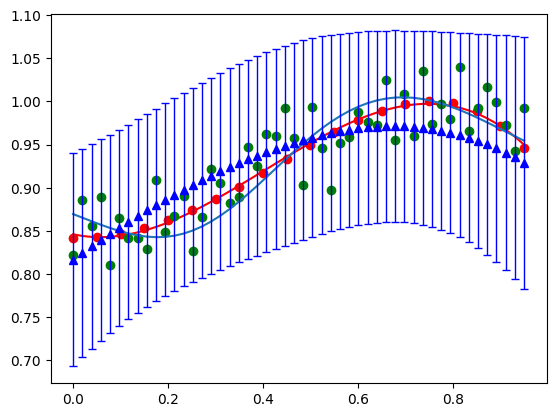

N1 = 19
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48, 18, 32, 29, 26]
19


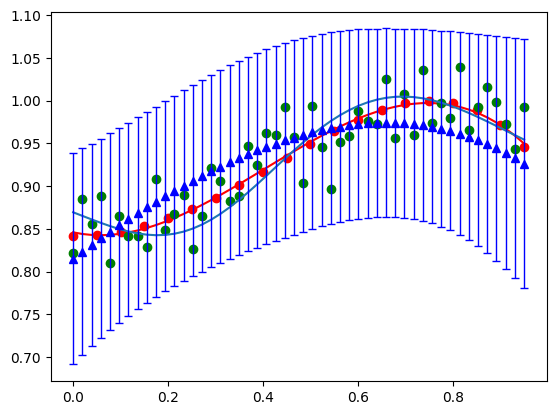

N1 = 20
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48, 18, 32, 29, 26, 35]
20


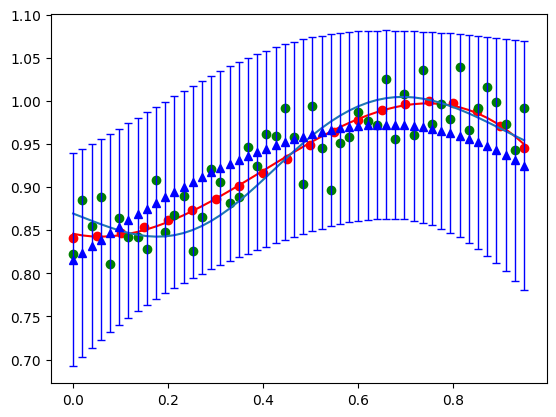

N1 = 21
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48, 18, 32, 29, 26, 35, 33]
21


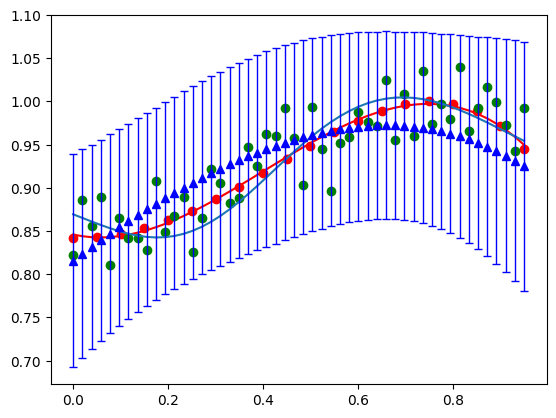

N1 = 22
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48, 18, 32, 29, 26, 35, 33, 32]
22


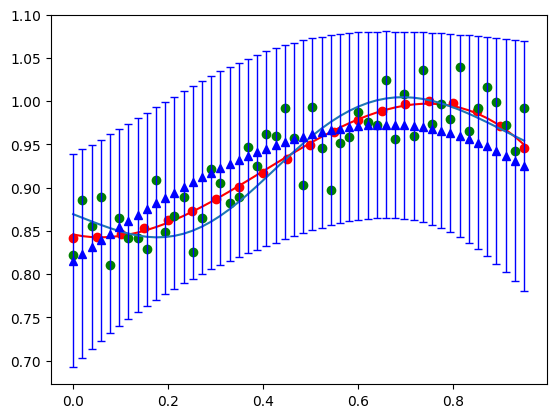

N1 = 23
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48, 18, 32, 29, 26, 35, 33, 32, 27]
23


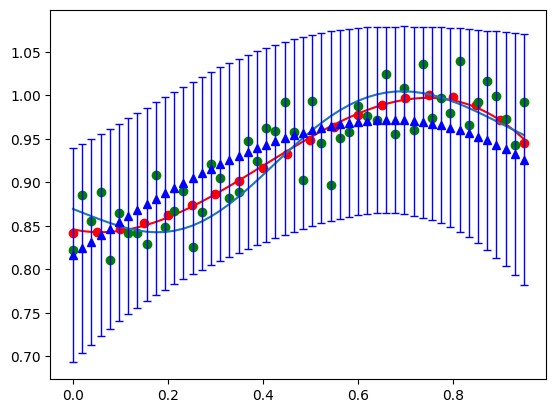

N1 = 24
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48, 18, 32, 29, 26, 35, 33, 32, 27, 19]
24


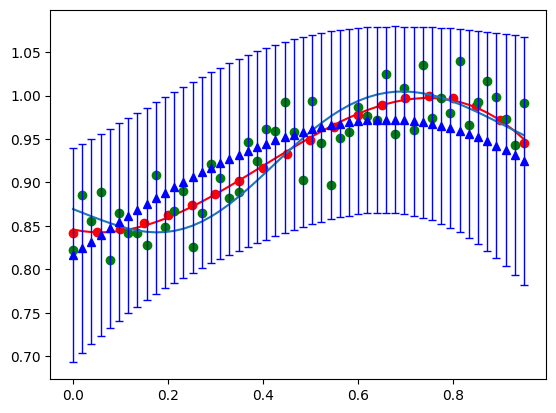

N1 = 25
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48, 18, 32, 29, 26, 35, 33, 32, 27, 19, 14]
25


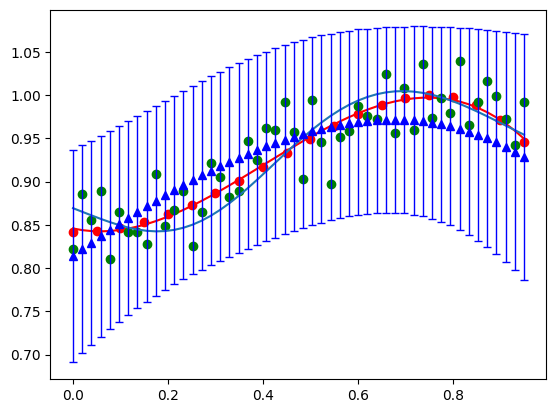

N1 = 26
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48, 18, 32, 29, 26, 35, 33, 32, 27, 19, 14, 41]
26


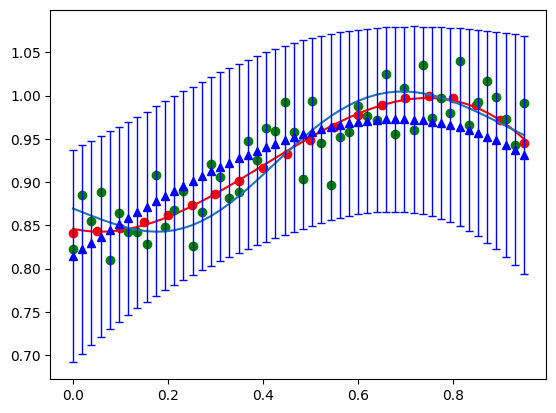

N1 = 27
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48, 18, 32, 29, 26, 35, 33, 32, 27, 19, 14, 41, 11]
27


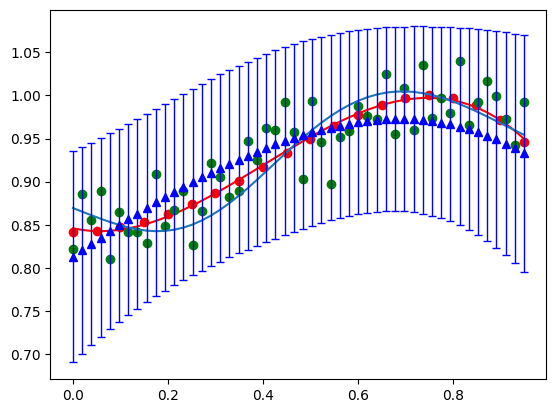

N1 = 28
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48, 18, 32, 29, 26, 35, 33, 32, 27, 19, 14, 41, 11, 37]
28


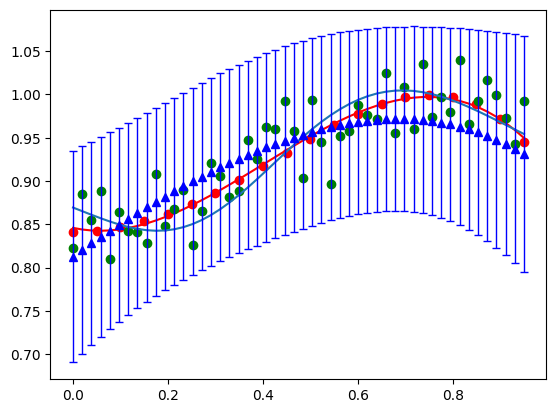

N1 = 29
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48, 18, 32, 29, 26, 35, 33, 32, 27, 19, 14, 41, 11, 37, 48]
29


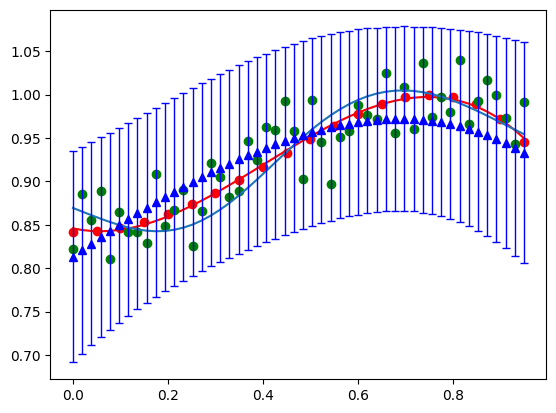

N1 = 30
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48, 18, 32, 29, 26, 35, 33, 32, 27, 19, 14, 41, 11, 37, 48, 41]
30


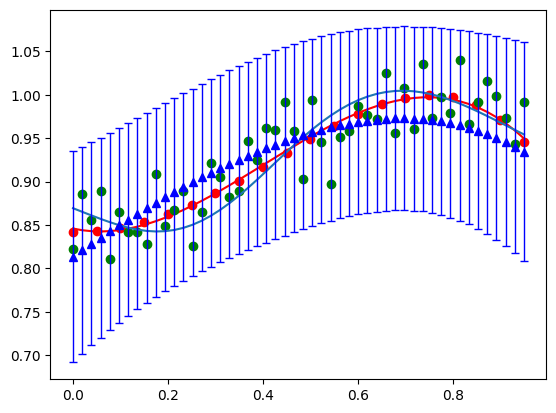

N1 = 31
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48, 18, 32, 29, 26, 35, 33, 32, 27, 19, 14, 41, 11, 37, 48, 41, 7]
31


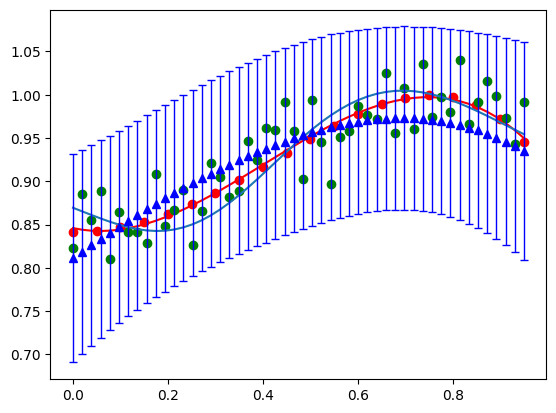

N1 = 32
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48, 18, 32, 29, 26, 35, 33, 32, 27, 19, 14, 41, 11, 37, 48, 41, 7, 35]
32


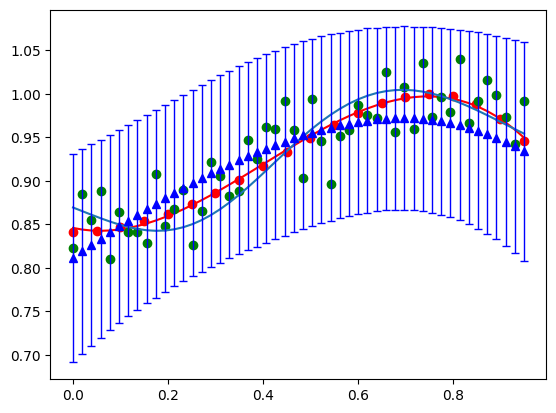

N1 = 33
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48, 18, 32, 29, 26, 35, 33, 32, 27, 19, 14, 41, 11, 37, 48, 41, 7, 35, 41]
33


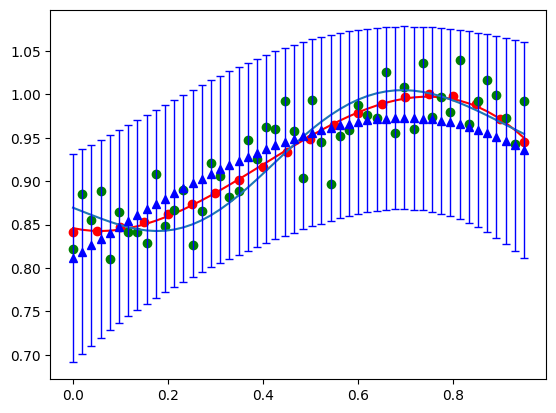

N1 = 34
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48, 18, 32, 29, 26, 35, 33, 32, 27, 19, 14, 41, 11, 37, 48, 41, 7, 35, 41, 23]
34


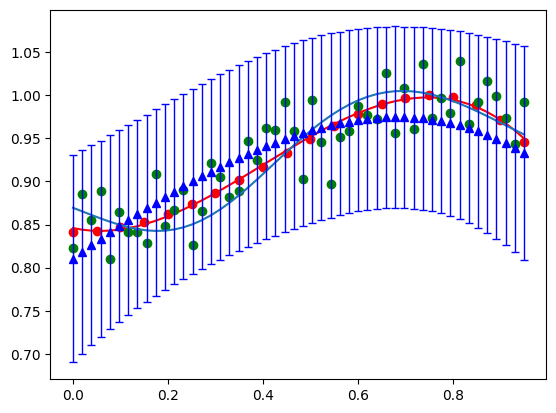

N1 = 35
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48, 18, 32, 29, 26, 35, 33, 32, 27, 19, 14, 41, 11, 37, 48, 41, 7, 35, 41, 23, 24]
35


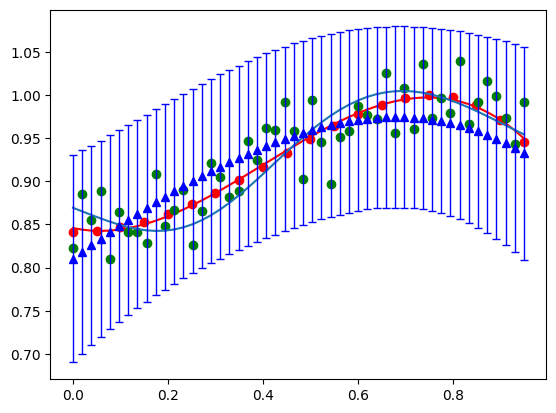

N1 = 36
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48, 18, 32, 29, 26, 35, 33, 32, 27, 19, 14, 41, 11, 37, 48, 41, 7, 35, 41, 23, 24, 33]
36


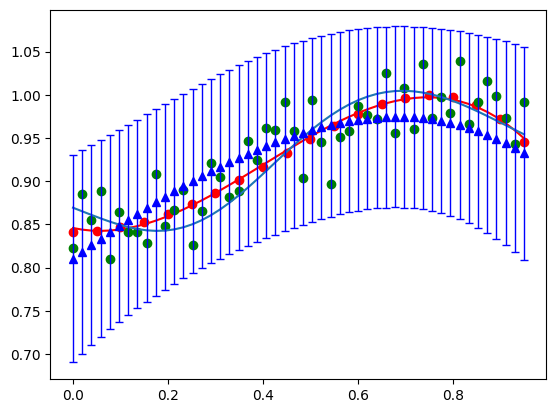

N1 = 37
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48, 18, 32, 29, 26, 35, 33, 32, 27, 19, 14, 41, 11, 37, 48, 41, 7, 35, 41, 23, 24, 33, 5]
37


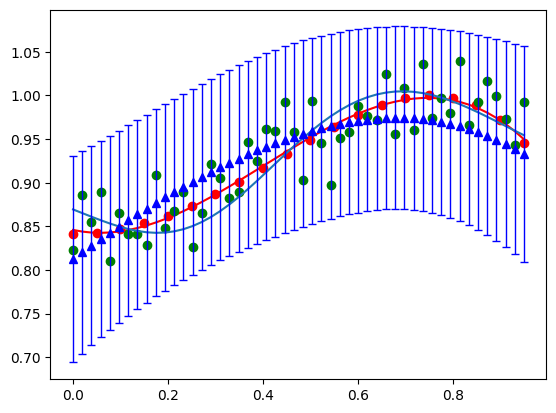

N1 = 38
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48, 18, 32, 29, 26, 35, 33, 32, 27, 19, 14, 41, 11, 37, 48, 41, 7, 35, 41, 23, 24, 33, 5, 46]
38


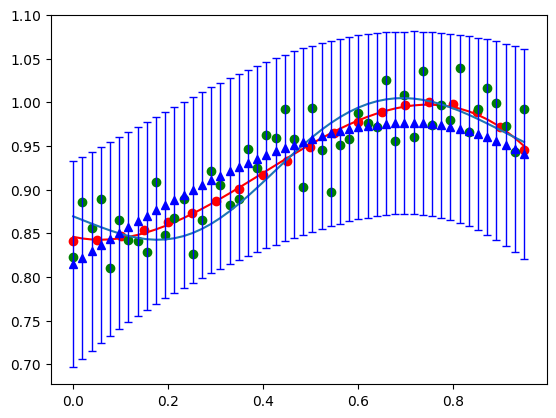

N1 = 39
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48, 18, 32, 29, 26, 35, 33, 32, 27, 19, 14, 41, 11, 37, 48, 41, 7, 35, 41, 23, 24, 33, 5, 46, 48]
39


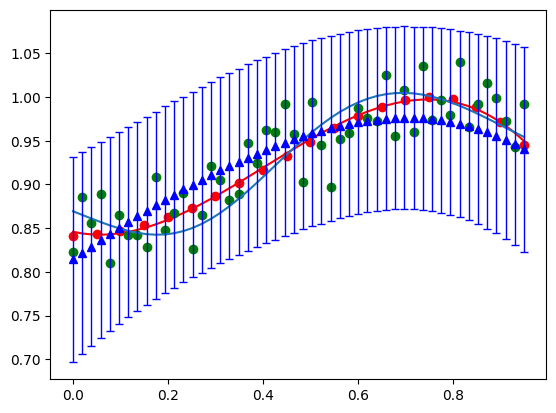

N1 = 40
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48, 18, 32, 29, 26, 35, 33, 32, 27, 19, 14, 41, 11, 37, 48, 41, 7, 35, 41, 23, 24, 33, 5, 46, 48, 39]
40


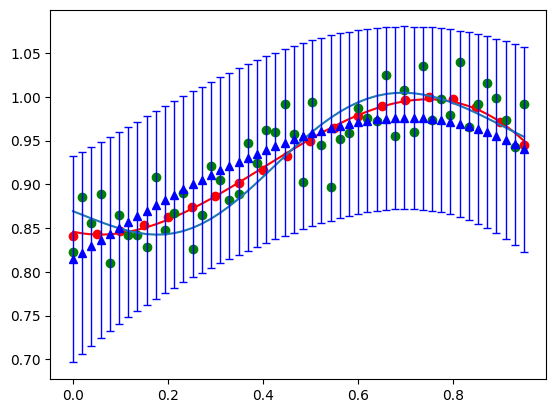

N1 = 41
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48, 18, 32, 29, 26, 35, 33, 32, 27, 19, 14, 41, 11, 37, 48, 41, 7, 35, 41, 23, 24, 33, 5, 46, 48, 39, 43]
41


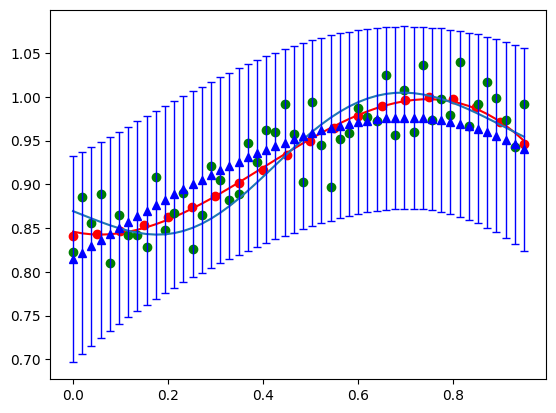

N1 = 42
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48, 18, 32, 29, 26, 35, 33, 32, 27, 19, 14, 41, 11, 37, 48, 41, 7, 35, 41, 23, 24, 33, 5, 46, 48, 39, 43, 36]
42


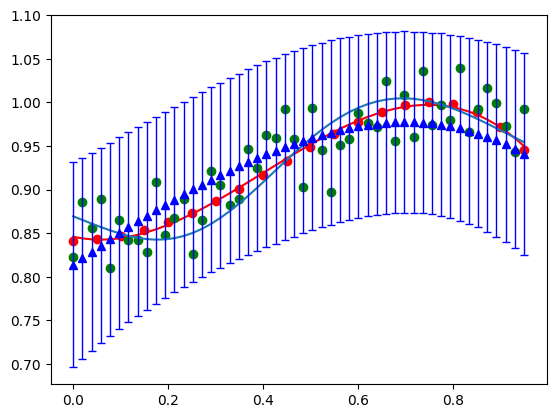

N1 = 43
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48, 18, 32, 29, 26, 35, 33, 32, 27, 19, 14, 41, 11, 37, 48, 41, 7, 35, 41, 23, 24, 33, 5, 46, 48, 39, 43, 36, 8]
43


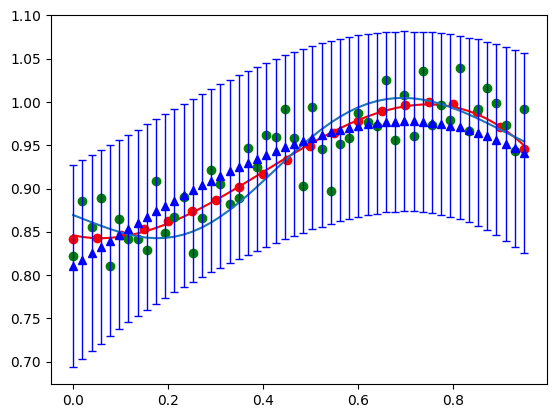

N1 = 44
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48, 18, 32, 29, 26, 35, 33, 32, 27, 19, 14, 41, 11, 37, 48, 41, 7, 35, 41, 23, 24, 33, 5, 46, 48, 39, 43, 36, 8, 31]
44


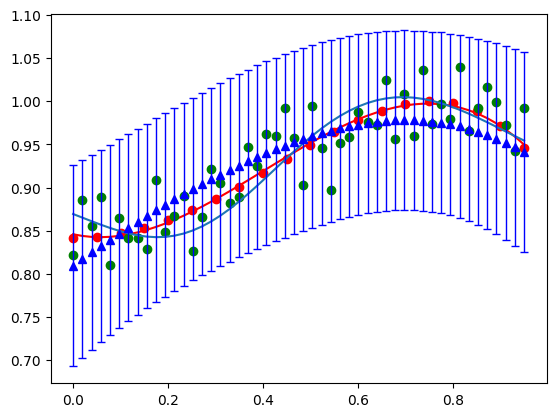

N1 = 45
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48, 18, 32, 29, 26, 35, 33, 32, 27, 19, 14, 41, 11, 37, 48, 41, 7, 35, 41, 23, 24, 33, 5, 46, 48, 39, 43, 36, 8, 31, 30]
45


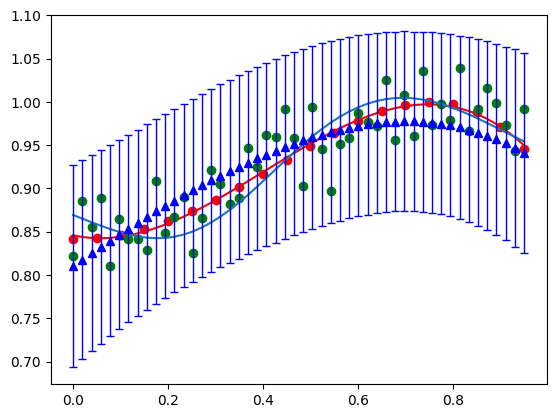

N1 = 46
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48, 18, 32, 29, 26, 35, 33, 32, 27, 19, 14, 41, 11, 37, 48, 41, 7, 35, 41, 23, 24, 33, 5, 46, 48, 39, 43, 36, 8, 31, 30, 7]
46


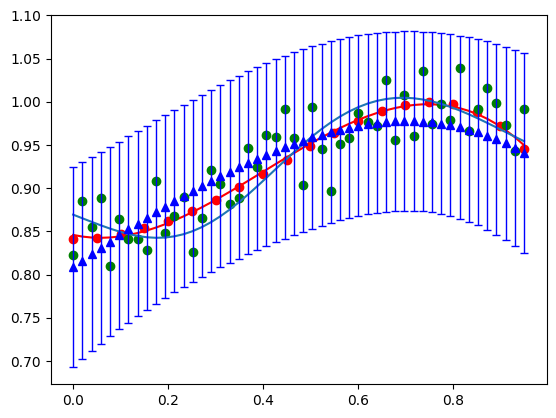

N1 = 47
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48, 18, 32, 29, 26, 35, 33, 32, 27, 19, 14, 41, 11, 37, 48, 41, 7, 35, 41, 23, 24, 33, 5, 46, 48, 39, 43, 36, 8, 31, 30, 7, 6]
47


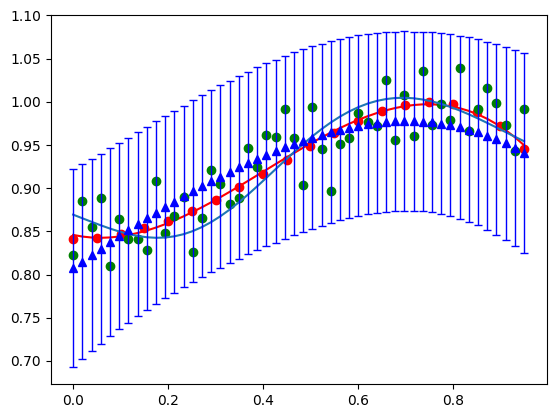

N1 = 48
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48, 18, 32, 29, 26, 35, 33, 32, 27, 19, 14, 41, 11, 37, 48, 41, 7, 35, 41, 23, 24, 33, 5, 46, 48, 39, 43, 36, 8, 31, 30, 7, 6, 38]
48


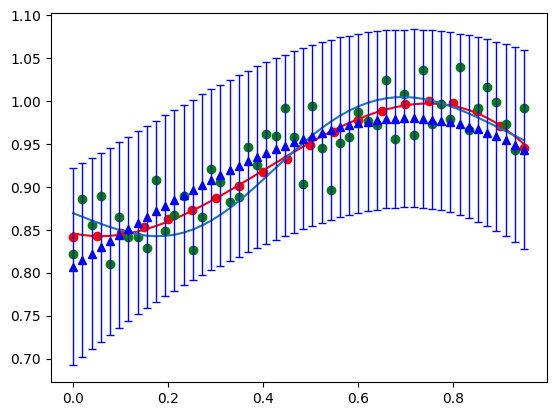

N1 = 49
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48, 18, 32, 29, 26, 35, 33, 32, 27, 19, 14, 41, 11, 37, 48, 41, 7, 35, 41, 23, 24, 33, 5, 46, 48, 39, 43, 36, 8, 31, 30, 7, 6, 38, 13]
49


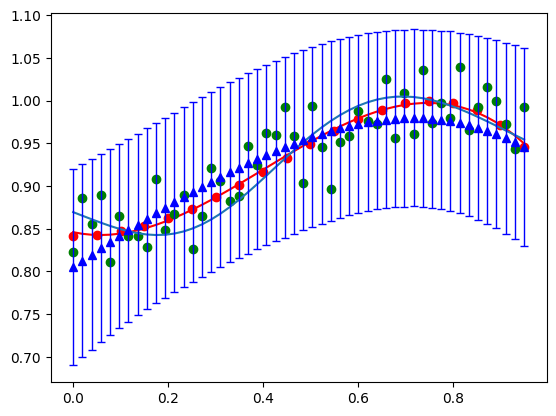

N1 = 50
M = 14
N2 = 50
[5, 4, 25, 9, 39, 33, 39, 27, 43, 3, 36, 9, 6, 0, 48, 18, 32, 29, 26, 35, 33, 32, 27, 19, 14, 41, 11, 37, 48, 41, 7, 35, 41, 23, 24, 33, 5, 46, 48, 39, 43, 36, 8, 31, 30, 7, 6, 38, 13, 47]
50


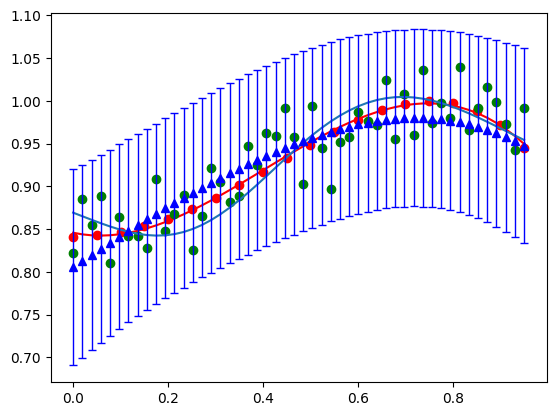

In [7]:
def predictive_distribution(x,y,M,alpha,beta,s):
    N=len(x)
    print('N1 =',N)
    print('M =',M)
    mx=np.zeros([N,M+1])
    vy=np.zeros([N,1])
    I=np.identity(M+1)
    Ialpha=alpha*I
    
    for n in range(0,N):
        for m in range(0,M+1):
            if m == 0:
                mx[n][m]=1
            else:
                mu = m/(M+1)
                mx[n][m]=Gaussian_basis_Func(x[n],mu,s)
        vy[n][0]=y[n]
    #print('mx =',mx)
    mxx = np.dot(mx.T, mx)
    imxx = linalg.inv (beta * mxx + Ialpha)# covariance matrix 
    tmp=np.dot(imxx,mx.T)
    mn=np.dot(beta*tmp,vy)
    #print('imxx =',imxx)
    #print('mn =',mn)
    return imxx,mn

def predictive_distribution_plot(x,mn,SN,s,beta):
    M=len(mn)-1
    N=len(x)
    print('N2 =',N)
    mx=np.zeros([N,M+1])
    
    for n in range(0,N):
        for m in range(0,M+1):
            if m == 0:
                mx[n][m]=1
            else:
                mu = m/(M+1)
                mx[n][m]=Gaussian_basis_Func(x[n],mu,s)         
    M_star = np.zeros([50,1])
    S_star = np.zeros(50)
    for i in range(N):
        M_star[i] = np.dot(mx[i], mn)
        S_star[i] = 1/beta + np.dot(np.dot(mx[i],SN),mx[i].T)
    return S_star, M_star 
#===============================================
print('start...')

#set parameter
M=14
alpha=0.5
beta=10
s=0.5

#generate true data
x_true,y_true = actual_distribution()

#fit on the actual data
f=numpy_poly_fitting(x_true,y_true,M=3)
#print('f:',f)
x_curve=np.linspace(x_true[0],x_true[-1],50)
y_curve=f(x_curve)

#add noise on the true data
y_noise=add_noise(y_curve)
x_noise=x_curve

#predictive the curve from the noisy data
x_noise_tmp = []
y_noise_tmp = []
tt = []
for i in range(0, len(x_noise)):
    t = np.random.randint(0,50)
    tt.append(t)

    x_noise_tmp.append(x_noise[t])
    y_noise_tmp.append(y_noise[t])

    imxx, mn = predictive_distribution(x_noise_tmp, y_noise_tmp, M, alpha, beta, s)
    S_star, M_star =  predictive_distribution_plot(x_noise, mn, imxx, s, beta)
    #print('x_noise_tmp =',x_noise_tmp) 
    
    y_est_list = []
    for i in range (0,len(M_star)):
        y_est_list.append(M_star[i][0])
    #print('M_star =',M_star)    
    #show plot
    plt.plot(x_true,y_true,'ro')
    plt.plot(x_curve,y_curve,'red')
    plt.plot(x_noise,y_noise,'go')
    plt.plot(x_est,y_est)
    plt.errorbar(x_noise, y_est_list, yerr = S_star, fmt='b^', ecolor = 'blue',elinewidth=1, capsize = 3)
    #print('y_est_list =',y_est_list)
    #print('S_star =',S_star)
    print(tt)
    print(len(tt))
    plt.show()


## 8.Explain why the predictive distribution is better than the original form of the full Bayesian inference.

## 9.Discuss the differences between p(t_new|t) and p(w|t).